In [1]:
import numpy as np 
import pandas as pd 


# DRAGONS
import xgboost as xgb
import lightgbm as lgb
import catboost as cat


# plots
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import ast
from tqdm import tqdm
from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

import os





random_seed = 2019


In [2]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [3]:
%%time
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Wall time: 879 ms


In [4]:
print("Dimension of train : " + str(train.shape) + " || Dimension of test : " + str(test.shape))

Dimension of train : (3000, 23) || Dimension of test : (4398, 22)


In [5]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
print("Types columns : \n" + str(train.dtypes))

Types columns : 
id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object


In [7]:
print("Count NA Train for the variable budget : \n" + str(train[train.budget == 0].shape[0]) + "\n")
print("Count NA Test for the variable budget : \n" + str(test[test.budget == 0].shape[0]) + "\n")
print("Count NA Train per column : \n" + str(train.isna().sum()))


Count NA Train for the variable budget : 
812

Count NA Test for the variable budget : 
1211

Count NA Train per column : 
id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


In [8]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [9]:
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [10]:
release_dates = pd.read_csv('release_dates_per_country.csv')
release_dates['id'] = range(1,7399)
release_dates.drop(['original_title','title'],axis = 1,inplace = True)
#release_dates.index = release_dates['id']
train = pd.merge(train, release_dates, how='left', on=['id'])
test = pd.merge(test, release_dates, how='left', on=['id'])

In [11]:
#better_dataset = pd.read_csv('movies_metadata.csv')[["imdb_id","vote_count","vote_average"]]
#better_dataset.describe()
#train = pd.merge(train, better_dataset, how='left', on=['imdb_id'])
#test = pd.merge(test, better_dataset, how='left', on=['imdb_id'])

In [12]:
train.describe()

,id,budget,popularity,runtime,revenue,release_year,movie_id,theatrical,theatrical_limited,IT,...,IL,PL,ID,MX,AT,SI,HU,KW,BG,PE
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000,3000.000000,2994.000000,2994.000000,2994.000000,...,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.00000
mean,1500.500000,2.266135e+07,8.463274,107.856571,6.668176e+07,1999.713000,66824.203333,10.738143,0.102872,0.396126,...,0.112224,0.130929,0.038744,0.103206,0.091516,0.046426,0.186707,0.064462,0.101870,0.05177
std,866.169729,3.702662e+07,12.104000,22.086434,1.375149e+08,15.423313,99553.178553,14.080109,0.454519,0.489855,...,0.315695,0.337379,0.193017,0.304279,0.289546,0.210441,0.389741,0.245616,0.302528,0.22160
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,1921.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06,1993.000000,9639.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,2004.000000,19074.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07,2011.000000,70632.000000,11.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,2017.000000,573531.000000,105.000000,9.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [13]:
trainAdditionalFeatures = pd.read_csv('TrainAdditionalFeatures.csv')[['imdb_id','popularity2','rating']]
testAdditionalFeatures = pd.read_csv('TestAdditionalFeatures.csv')[['imdb_id','popularity2','rating']]

train = pd.merge(train, trainAdditionalFeatures, how='left', on=['imdb_id'])
test = pd.merge(test, testAdditionalFeatures, how='left', on=['imdb_id'])

In [14]:
train.describe()

,id,budget,popularity,runtime,revenue,release_year,movie_id,theatrical,theatrical_limited,IT,...,ID,MX,AT,SI,HU,KW,BG,PE,popularity2,rating
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000,3000.000000,2994.000000,2994.000000,2994.000000,...,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2994.00000,2882.000000,2882.000000
mean,1500.500000,2.266135e+07,8.463274,107.856571,6.668176e+07,1999.713000,66824.203333,10.738143,0.102872,0.396126,...,0.038744,0.103206,0.091516,0.046426,0.186707,0.064462,0.101870,0.05177,8.029303,6.366308
std,866.169729,3.702662e+07,12.104000,22.086434,1.375149e+08,15.423313,99553.178553,14.080109,0.454519,0.489855,...,0.193017,0.304279,0.289546,0.210441,0.389741,0.245616,0.302528,0.22160,4.959153,0.887465
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,1921.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.600000,1.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06,1993.000000,9639.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.046250,5.800000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,2004.000000,19074.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.503500,6.400000
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07,2011.000000,70632.000000,11.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9.987000,7.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,2017.000000,573531.000000,105.000000,9.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,45.153000,9.000000


In [15]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,ID,MX,AT,SI,HU,KW,BG,PE,popularity2,rating
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.400,5.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.229,6.4
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.082,8.4
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.531,7.5
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


Text(0.5, 1.0, 'Link between revenue and budget')

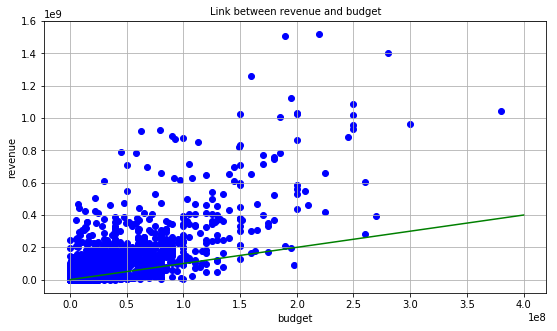

In [16]:
x1 = np.array(train["budget"])
y1 = np.array(train["revenue"])

fig = plt.figure(1, figsize=(9, 5))


plt.plot([0,400000000],[0,400000000],c="green")
plt.scatter(x1, y1, c=['blue'],marker='o')
plt.grid()
plt.xlabel("budget", fontsize=10)  
plt.ylabel("revenue", fontsize=10)
plt.title("Link between revenue and budget", fontsize=10)

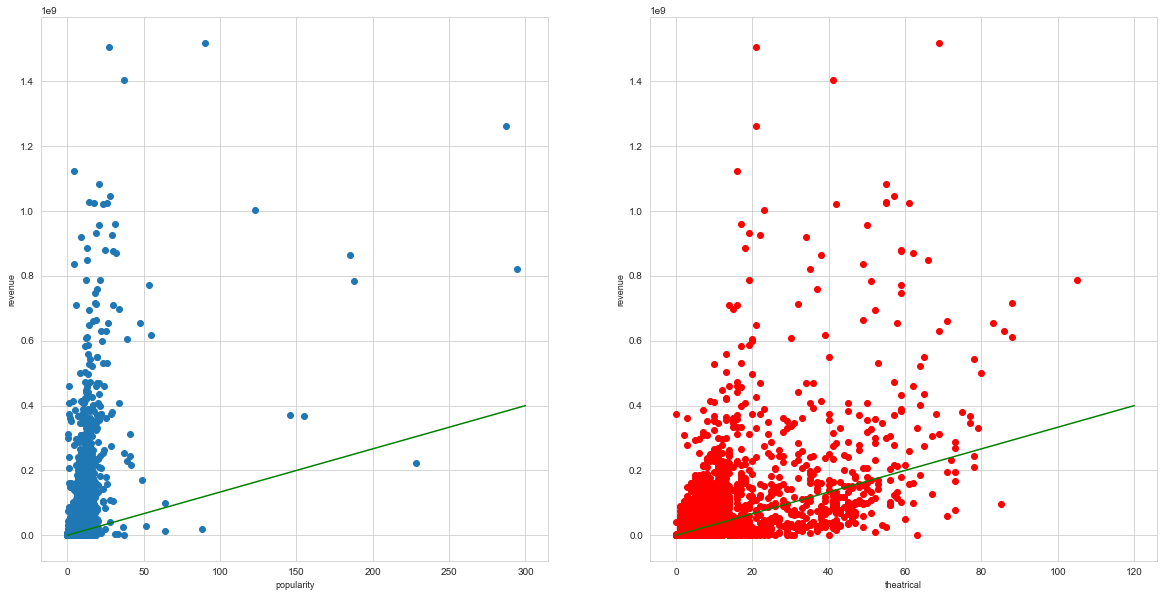

In [17]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(1,2,figsize=(20,10))
plt.subplot(1,2,1)
plt.plot([0,300],[0,400000000],c="green")
plt.scatter(train["popularity"], train["revenue"], marker='o')
plt.xlabel("popularity", fontsize=9)
plt.ylabel("revenue", fontsize=9)
plt.subplot(1,2,2)
plt.plot([0,120],[0,400000000],c="green")
plt.scatter(train["theatrical"], train["revenue"], marker='o',color = 'red')
plt.xlabel("theatrical", fontsize=9)
plt.ylabel("revenue", fontsize=9)
plt.show()

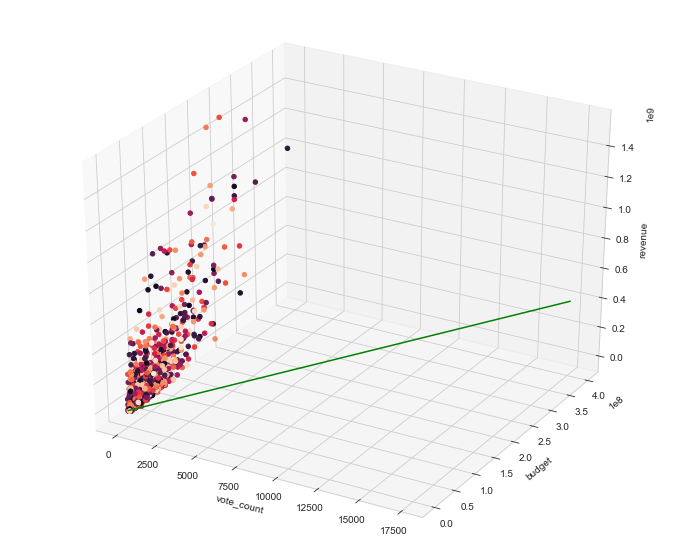

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,10))
plt.subplot(1,2,1)
ax = plt.subplot(projection='3d')
colors = np.random.rand(len(train))

xs = np.array(train['runtime'])
ys = np.array(train['budget'])
zs = np.array(train['revenue'])
ax.scatter(xs,ys, zs, c= colors,marker='o', alpha=1)
plt.plot([0,17500],[0,400000000],[0,400000000],c="green")

ax.set_xlabel('vote_count')
ax.set_ylabel('budget')
ax.set_zlabel('revenue')

plt.show()

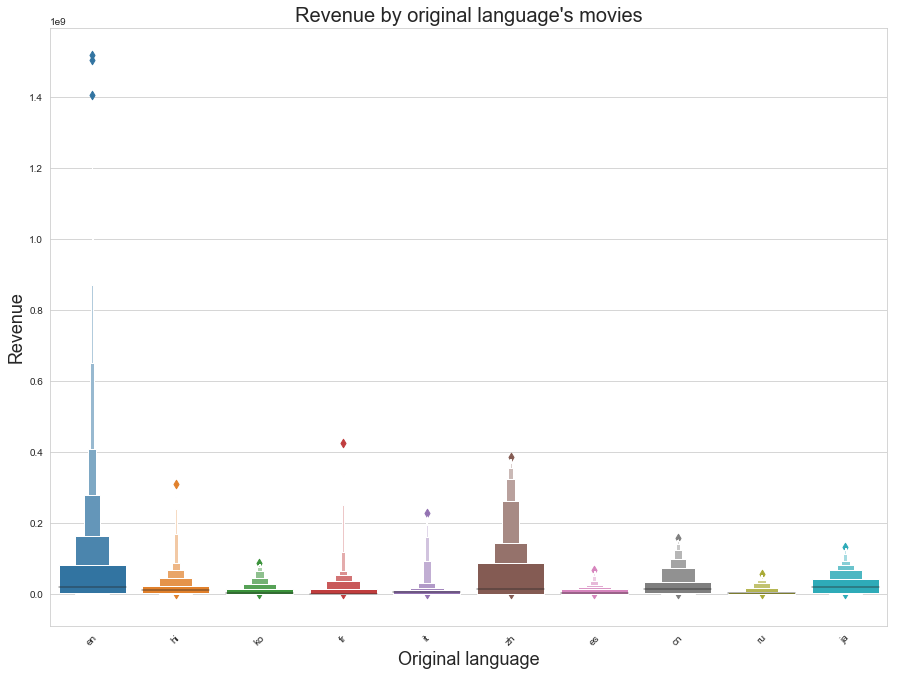

In [19]:
plt.figure(figsize=(15,11)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.boxenplot(x='original_language', y='revenue', 
                   data=train[(train['original_language'].isin((train['original_language'].value_counts()[:10].index.values)))])
g1.set_title("Revenue by original language's movies", fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Original language', fontsize=18) # Xlabel
g1.set_ylabel('Revenue', fontsize=18) #Ylabel

plt.show()

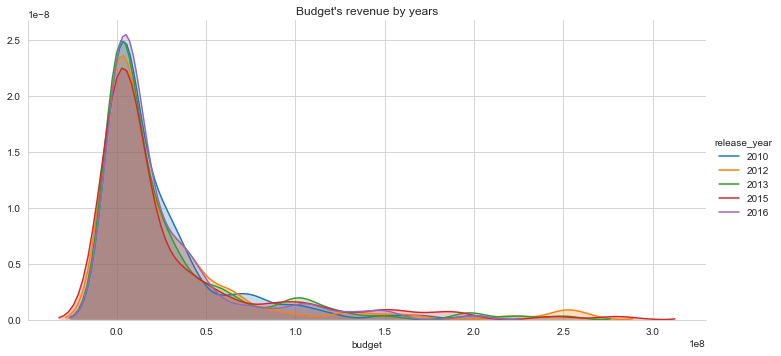

In [20]:
(sns.FacetGrid(train[(train['release_year']\
                        .isin(train['release_year']\
                              .value_counts()[:5].index.values))],
               hue='release_year', height=5, aspect=2)
  .map(sns.kdeplot, 'budget', shade=True)
 .add_legend()
)
plt.title("Budget's revenue by years")
plt.show()

Text(0.5, 1.0, 'Distribuition of Revenue')

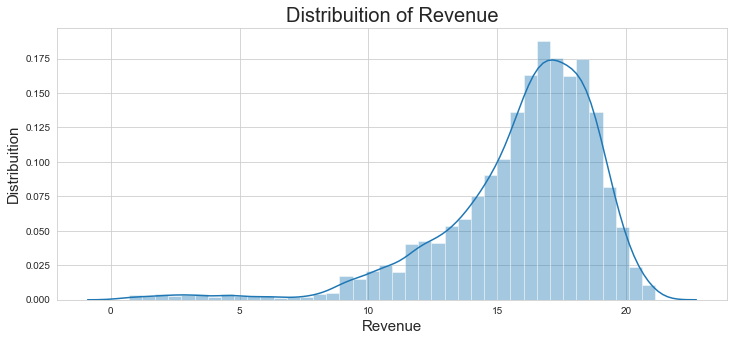

In [21]:
plt.figure(figsize=(12,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1

# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(np.log1p(train['revenue']), bins=40, kde=True)
ax.set_xlabel('Revenue', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue", fontsize=20) #seting the title and size of font

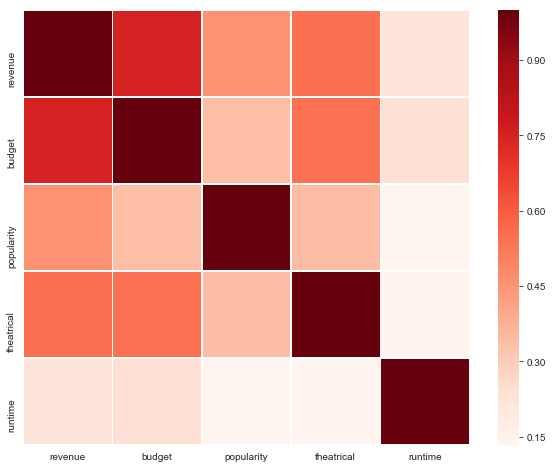

In [22]:
col = ['revenue','budget','popularity','theatrical','runtime']

plt.subplots(figsize=(10, 8))

corr = train[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Reds")

In [23]:
def prepare(df):
    global json_cols
    global train_dict
    #df['totalVotes'] = df['totalVotes'].fillna(6)

    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    df['release_year'] = df['release_year']
    df.loc[ (df['release_year'] <= 18) & (df['release_year'] < 100), "release_year"] += 2000
    df.loc[ (df['release_year'] > 18)  & (df['release_year'] < 100), "release_year"] += 1900
    
    rating_na = df.groupby(["release_year","original_language"])['rating'].mean().reset_index()
    df[df.rating.isna()]['rating'] = df.merge(rating_na, how = 'left' ,on = ["release_year","original_language"])
    
    #vote_count_na = df.groupby(["release_year","original_language"])['vote_count'].mean().reset_index()
    #df[df.vote_count.isna()]['vote_count'] = df.merge(vote_count_na, how = 'left' ,on = ["release_year","original_language"])
    
    #budget_na = df.groupby(["release_year","original_language"])['budget'].mean().reset_index()
    #df.loc[df.budget == 0]['budget'] = df.merge(budget_na, how = 'left' ,on = ["release_year","original_language"])

    df['budget'] = np.log1p(df['budget'])
    
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

    
    df['_collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
    le = LabelEncoder()
    le.fit(list(df['_collection_name'].fillna('')))
    df['_collection_name'] = le.transform(df['_collection_name'].fillna('').astype(str))
    df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
    df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)
    
    releaseDate = pd.to_datetime(df['release_date']) 
    df['release_dayofweek'] = releaseDate.dt.dayofweek 
    df['release_quarter'] = releaseDate.dt.quarter     

    df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/(df['release_year']*df['release_year'])
    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']


    df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].aggregate('mean')
    df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].aggregate('mean')
    df['meanBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('mean')
    df['_popularity_theatrical_ratio'] = df['theatrical']/df['popularity']
    df['_budget_theatrical_ratio'] = df['budget']/df['theatrical']
    #df['mean_theatrical_ByYear'] = df.groupby("release_year")["theatrical"].aggregate('mean')
    #df['_popularity_totalVotes_ratio'] = df['vote_count']/df['popularity']
    #df['_totalVotes_releaseYear_ratio'] = df['vote_count']/df['release_year']
    #df['_budget_totalVotes_ratio'] = df['budget']/df['vote_count']
    
    
    df['_rating_popularity_ratio'] = df['rating']/df['popularity']
    #df['_rating_totalVotes_ratio'] = df['vote_count']/df['rating']
    df['_budget_rating_ratio'] = df['budget']/df['rating']
    df['_runtime_rating_ratio'] = df['runtime']/df['rating']
    
    
    df['has_homepage'] = 0
    df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 1
    
    df['isbelongs_to_collectionNA'] = 0
    df.loc[pd.isnull(df['belongs_to_collection']) ,"isbelongs_to_collectionNA"] = 1
    
    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 

    df['isOriginalLanguageEng'] = 0 
    df.loc[ df['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
    df['isTitleDifferent'] = 1
    df.loc[ df['original_title'] == df['title'] ,"isTitleDifferent"] = 0 

    df['isMovieReleased'] = 1
    df.loc[ df['status'] != "Released" ,"isMovieReleased"] = 0 

    # get collection id
    df['collection_id'] = df['belongs_to_collection'].apply(lambda x : np.nan if len(x)==0 else x[0]['id'])
    
    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len() 


    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    df['production_countries_count'] = df['production_countries'].apply(lambda x : len(x))
    df['production_companies_count'] = df['production_companies'].apply(lambda x : len(x))
    df['cast_count'] = df['cast'].apply(lambda x : len(x))
    df['crew_count'] = df['crew'].apply(lambda x : len(x))

    
    

    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False)
    df.drop(['genres_etc'], axis = 1, inplace = True)
    
    df = df.drop(['belongs_to_collection','genres','homepage','imdb_id','overview','runtime'
    ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
    ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id','movie_id'
    ],axis=1)
    
    df.fillna(value=0.0, inplace = True) 

    return df

In [24]:
test['revenue'] = np.nan

json_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

for col in tqdm(json_cols + ['belongs_to_collection']) :
    train[col] = train[col].apply(lambda x : get_dictionary(x))
    test[col] = test[col].apply(lambda x : get_dictionary(x))

print(train.shape)
train.head()

100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


(3000, 68)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,ID,MX,AT,SI,HU,KW,BG,PE,popularity2,rating
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.400,5.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.229,6.4
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.082,8.4
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.531,7.5
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [25]:
# parse json data and build category dictionary
def get_json_dict(df) :
    global json_cols
    result = dict()
    for e_col in json_cols :
        d = dict()
        rows = df[e_col].values
        for row in rows :
            if row is None : continue
            for i in row :
                if i['name'] not in d :
                    d[i['name']] = 0
                d[i['name']] += 1
        result[e_col] = d
    return result

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

# remove cateogry with bias and low frequency
for col in json_cols :
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   
    
    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
            
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]
            
    print(col, 'size :', len(train_id.union(test_id)), '->', len(train_dict[col]))

genres size : 20 -> 19
production_companies size : 7087 -> 77
production_countries size : 98 -> 25
spoken_languages size : 64 -> 27
Keywords size : 11930 -> 358
cast size : 75944 -> 376
crew size : 68763 -> 516


In [26]:
# prepare data
all_data = prepare(pd.concat([train, test]).reset_index(drop = True))
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:]                           
print(train.shape)
train.head()

(3000, 237)


,AR,AT,AU,BE,BG,CA,CL,CZ,DE,DK,...,UK Film Council,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Wild Bunch,Wildwood Enterprises,Working Title Films,production_companies_etc
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
features = list(train.columns)
features =  [i for i in features if i != 'id' and i != 'revenue']

In [28]:
from sklearn.metrics import mean_squared_error
def score(data, y):
    validation_res = pd.DataFrame(
    {"id": data["id"].values,
     "transactionrevenue": data["revenue"].values,
     "predictedrevenue": np.expm1(y)})

    validation_res = validation_res.groupby("id")["transactionrevenue", "predictedrevenue"].sum().reset_index()
    return np.sqrt(mean_squared_error(np.log1p(validation_res["transactionrevenue"].values), 
                                     np.log1p(validation_res["predictedrevenue"].values)))

In [29]:
from sklearn.model_selection import GroupKFold

class KFoldValidation():
    def __init__(self, data, n_splits=5):
        unique_vis = np.array(sorted(data['id'].astype(str).unique()))
        folds = GroupKFold(n_splits)
        ids = np.arange(data.shape[0])
        
        self.fold_ids = []
        for trn_vis, val_vis in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
            self.fold_ids.append([
                    ids[data['id'].astype(str).isin(unique_vis[trn_vis])],
                    ids[data['id'].astype(str).isin(unique_vis[val_vis])]
                ])
            
    def validate(self, train, test, features, model, name="", prepare_stacking=False, 
                 fit_params={"early_stopping_rounds": 500, "verbose": 100, "eval_metric": "rmse"}):
        model.FI = pd.DataFrame(index=features)
        full_score = 0
        
        if prepare_stacking:
            test[name] = 0
            train[name] = np.NaN
        
        for fold_id, (trn, val) in enumerate(self.fold_ids):
            devel = train[features].iloc[trn]
            y_devel = np.log1p(train["revenue"].iloc[trn])
            valid = train[features].iloc[val]
            y_valid = np.log1p(train["revenue"].iloc[val])
                       
            print("Fold ", fold_id, ":")
            model.fit(devel, y_devel, eval_set=[(valid, y_valid)], **fit_params)
            
            if len(model.feature_importances_) == len(features):  
                model.FI['fold' + str(fold_id)] = model.feature_importances_ / model.feature_importances_.sum()

            predictions = model.predict(valid)
            predictions[predictions < 0] = 0
            print("Fold ", fold_id, " error: ", mean_squared_error(y_valid, predictions)**0.5)
            
            fold_score = score(train.iloc[val], predictions)
            full_score += fold_score / len(self.fold_ids)
            print("Fold ", fold_id, " score: ", fold_score)
            if prepare_stacking:
                train[name].iloc[val] = predictions
                
                test_predictions = model.predict(test[features])
                test_predictions[test_predictions < 0] = 0
                test[name] += test_predictions / len(self.fold_ids)
                
        print("Final score: ", full_score)
        return full_score

In [30]:
Kfolder = KFoldValidation(train)

In [31]:
lgbmodel = lgb.LGBMRegressor(n_estimators=10000, 
                             objective='regression', 
                             metric='rmse',
                             max_depth = 5,
                             num_leaves=30, 
                             min_child_samples=100,
                             learning_rate=0.01,
                             boosting = 'gbdt',
                             min_data_in_leaf= 10,
                             feature_fraction = 0.9,
                             bagging_freq = 1,
                             bagging_fraction = 0.9,
                             importance_type='gain',
                             lambda_l1 = 0.2,
                             bagging_seed=random_seed, 
                             subsample=.8, 
                             colsample_bytree=.9,
                             use_best_model=True)

In [32]:
Kfolder.validate(train, test, features , lgbmodel, name="lgbfinal", prepare_stacking=True) 

Fold  0 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.37127
[200]	valid_0's rmse: 2.19623
[300]	valid_0's rmse: 2.14168
[400]	valid_0's rmse: 2.1142
[500]	valid_0's rmse: 2.09515
[600]	valid_0's rmse: 2.08399
[700]	valid_0's rmse: 2.07555
[800]	valid_0's rmse: 2.07016
[900]	valid_0's rmse: 2.06686
[1000]	valid_0's rmse: 2.06449
[1100]	valid_0's rmse: 2.06317
[1200]	valid_0's rmse: 2.06021
[1300]	valid_0's rmse: 2.05719
[1400]	valid_0's rmse: 2.05566
[1500]	valid_0's rmse: 2.05636
[1600]	valid_0's rmse: 2.05505
[1700]	valid_0's rmse: 2.05581
[1800]	valid_0's rmse: 2.05502
[1900]	valid_0's rmse: 2.05433
[2000]	valid_0's rmse: 2.05509
[2100]	valid_0's rmse: 2.05475
[2200]	valid_0's rmse: 2.0546
[2300]	valid_0's rmse: 2.05524
Early stopping, best iteration is:
[1886]	valid_0's rmse: 2.05426
Fold  0  error:  2.054262824486022
Fold  0  score:  2.054262824486022
Fold  1 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's 

1.822743074185456

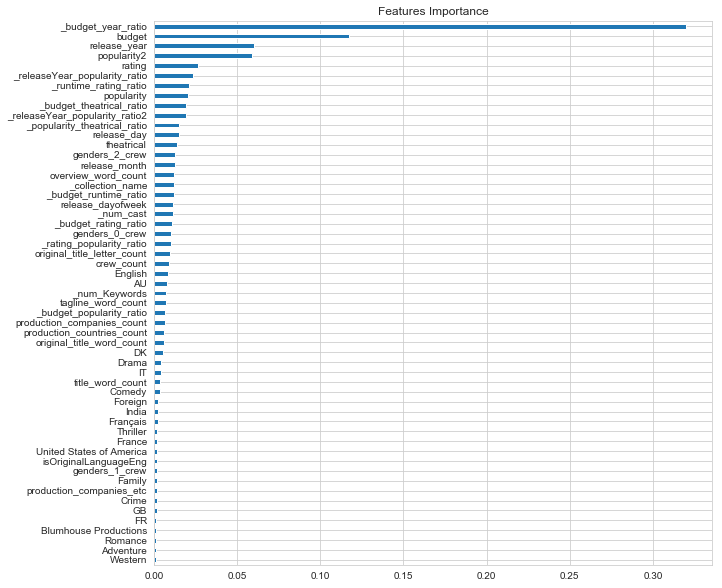

In [33]:
lgbmodel.FI.mean(axis=1).sort_values()[180:250].plot(kind="barh",title = "Features Importance", figsize = (10,10))

In [34]:
xgbmodel = xgb.XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            seed=random_seed, 
                            silent=True,
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)

In [35]:
Kfolder.validate(train, test, features, xgbmodel, name="xgbfinal", prepare_stacking=True)

Fold  0 :
[0]	validation_0-rmse:15.5556
Will train until validation_0-rmse hasn't improved in 500 rounds.
[100]	validation_0-rmse:6.04455
[200]	validation_0-rmse:2.99948
[300]	validation_0-rmse:2.28269
[400]	validation_0-rmse:2.16091
[500]	validation_0-rmse:2.12947
[600]	validation_0-rmse:2.11571
[700]	validation_0-rmse:2.10523
[800]	validation_0-rmse:2.09719
[900]	validation_0-rmse:2.09135
[1000]	validation_0-rmse:2.08742
[1100]	validation_0-rmse:2.08232
[1200]	validation_0-rmse:2.07957
[1300]	validation_0-rmse:2.0777
[1400]	validation_0-rmse:2.07673
[1500]	validation_0-rmse:2.07555
[1600]	validation_0-rmse:2.07407
[1700]	validation_0-rmse:2.07262
[1800]	validation_0-rmse:2.0712
[1900]	validation_0-rmse:2.06977
[2000]	validation_0-rmse:2.07012
[2100]	validation_0-rmse:2.07006
[2200]	validation_0-rmse:2.07026
[2300]	validation_0-rmse:2.06924
[2400]	validation_0-rmse:2.06795
[2500]	validation_0-rmse:2.06737
[2600]	validation_0-rmse:2.06657
[2700]	validation_0-rmse:2.06716
[2800]	validat

1.854379306386289

In [36]:
catmodel = cat.CatBoostRegressor(iterations=10000, 
                                 learning_rate=0.01, 
                                 depth=5, 
                                 eval_metric='RMSE',
                                 colsample_bylevel=0.8,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200,
                                 random_seed=random_seed)

In [37]:
Kfolder.validate(train, test, features , catmodel, name="catfinal", prepare_stacking=True,
               fit_params={"use_best_model": True, "verbose": 100})

Fold  0 :
0:	learn: 16.1173296	test: 16.0437637	best: 16.0437637 (0)	total: 87ms	remaining: 14m 29s
100:	learn: 6.4161617	test: 6.3867287	best: 6.3867287 (100)	total: 3.46s	remaining: 5m 39s
200:	learn: 3.1645145	test: 3.2366677	best: 3.2366677 (200)	total: 6.83s	remaining: 5m 32s
300:	learn: 2.2989024	test: 2.4671951	best: 2.4671951 (300)	total: 10.2s	remaining: 5m 28s
400:	learn: 2.0755163	test: 2.3110432	best: 2.3110432 (400)	total: 13.6s	remaining: 5m 24s
500:	learn: 1.9852262	test: 2.2615262	best: 2.2615262 (500)	total: 17s	remaining: 5m 22s
600:	learn: 1.9104028	test: 2.2321320	best: 2.2321320 (600)	total: 20.4s	remaining: 5m 18s
700:	learn: 1.8526718	test: 2.2094704	best: 2.2094704 (700)	total: 23.8s	remaining: 5m 15s
800:	learn: 1.7944019	test: 2.1880472	best: 2.1880472 (800)	total: 27.1s	remaining: 5m 11s
900:	learn: 1.7405311	test: 2.1703757	best: 2.1703757 (900)	total: 30.5s	remaining: 5m 7s
1000:	learn: 1.7027039	test: 2.1584695	best: 2.1584695 (1000)	total: 33.9s	remaining

1200:	learn: 1.7783954	test: 1.7895602	best: 1.7895602 (1200)	total: 42.9s	remaining: 5m 14s
1300:	learn: 1.7585671	test: 1.7780473	best: 1.7780473 (1300)	total: 46.4s	remaining: 5m 10s
1400:	learn: 1.7423544	test: 1.7661068	best: 1.7661068 (1400)	total: 50s	remaining: 5m 6s
1500:	learn: 1.7144231	test: 1.7385289	best: 1.7383612 (1496)	total: 53.7s	remaining: 5m 3s
1600:	learn: 1.7031895	test: 1.7306245	best: 1.7305558 (1585)	total: 57.3s	remaining: 5m
1700:	learn: 1.6971165	test: 1.7252006	best: 1.7251217 (1693)	total: 1m	remaining: 4m 57s
1800:	learn: 1.6934898	test: 1.7235165	best: 1.7234603 (1789)	total: 1m 4s	remaining: 4m 53s
1900:	learn: 1.6901047	test: 1.7194951	best: 1.7194873 (1899)	total: 1m 8s	remaining: 4m 49s
2000:	learn: 1.6873851	test: 1.7172868	best: 1.7171845 (1978)	total: 1m 11s	remaining: 4m 46s
2100:	learn: 1.6858999	test: 1.7156727	best: 1.7156662 (2096)	total: 1m 15s	remaining: 4m 43s
2200:	learn: 1.6842232	test: 1.7150526	best: 1.7150449 (2199)	total: 1m 18s	rem

500:	learn: 1.9965480	test: 2.2668711	best: 2.2668711 (500)	total: 19.2s	remaining: 6m 3s
600:	learn: 1.9312529	test: 2.2185435	best: 2.2185435 (600)	total: 23s	remaining: 5m 59s
700:	learn: 1.8767990	test: 2.1810520	best: 2.1810520 (700)	total: 26.6s	remaining: 5m 52s
800:	learn: 1.8204102	test: 2.1472136	best: 2.1472136 (800)	total: 30.2s	remaining: 5m 46s
900:	learn: 1.7487151	test: 2.1017927	best: 2.1017927 (900)	total: 33.8s	remaining: 5m 40s
1000:	learn: 1.6940016	test: 2.0714285	best: 2.0714285 (1000)	total: 37.4s	remaining: 5m 36s
1100:	learn: 1.6529499	test: 2.0531773	best: 2.0531773 (1100)	total: 41s	remaining: 5m 31s
1200:	learn: 1.6200078	test: 2.0400614	best: 2.0400614 (1200)	total: 44.6s	remaining: 5m 26s
1300:	learn: 1.5933631	test: 2.0314717	best: 2.0314369 (1297)	total: 48.2s	remaining: 5m 22s
1400:	learn: 1.5715554	test: 2.0232204	best: 2.0232204 (1400)	total: 51.8s	remaining: 5m 17s
1500:	learn: 1.5548526	test: 2.0177379	best: 2.0176864 (1498)	total: 55.4s	remaining:

1.822215346084927

In [38]:
train['Revenue_lgb'] = train["lgbfinal"]

print("RMSE model lgb :" ,score(train, train.Revenue_lgb),)

train['Revenue_xgb'] = train["xgbfinal"]

print("RMSE model xgb :" ,score(train, train.Revenue_xgb))

train['Revenue_cat'] = train["catfinal"]

print("RMSE model cat :" ,score(train, train.Revenue_cat))

train['Revenue_Dragon1'] = 0.4 * train["lgbfinal"] + \
                               0.2 * train["xgbfinal"] + \
                               0.4 * train["catfinal"]

print("RMSE model Dragon1 :" ,score(train, train.Revenue_Dragon1))

train['Revenue_Dragon2'] = 0.35 * train["lgbfinal"] + \
                               0.3 * train["xgbfinal"] + \
                               0.35 * train["catfinal"]

print("RMSE model Dragon2 :" ,score(train, train.Revenue_Dragon2))

RMSE model lgb : 1.8302681473816418
RMSE model xgb : 1.8610495606838124
RMSE model cat : 1.832067092478853
RMSE model Dragon1 : 1.8115671777329043
RMSE model Dragon2 : 1.8151220838645348


In [39]:
test['revenue'] =  np.expm1(test["lgbfinal"])
test[['id','revenue']].to_csv('lgb.csv', index=False)
test[['id','revenue']].head()

,id,revenue
3000,3001,1.257208e+07
3001,3002,2.905159e+05
3002,3003,7.275232e+06
3003,3004,6.214619e+06
3004,3005,9.908471e+05


In [40]:
test['revenue'] =  np.expm1(test["xgbfinal"])
test[['id','revenue']].to_csv('xgb.csv', index=False)
test[['id','revenue']].head()

,id,revenue
3000,3001,1.311721e+07
3001,3002,3.291957e+05
3002,3003,8.074705e+06
3003,3004,6.208552e+06
3004,3005,8.811814e+05


In [41]:
test['revenue'] =  np.expm1(test["catfinal"])
test[['id','revenue']].to_csv('submission_cat.csv', index=False)
test[['id','revenue']].head()

,id,revenue
3000,3001,5.404951e+06
3001,3002,9.030570e+05
3002,3003,4.292844e+06
3003,3004,7.387438e+06
3004,3005,8.618192e+05


In [42]:
test['revenue'] =  np.expm1(0.4 * test["lgbfinal"]+ 0.4 * test["catfinal"] + 0.2 * test["xgbfinal"])
test[['id','revenue']].to_csv('submission_Dragon1.csv', index=False)
test[['id','revenue']].head()

,id,revenue
3000,3001,9.045817e+06
3001,3002,4.688619e+05
3002,3003,6.015367e+06
3003,3004,6.658270e+06
3004,3005,9.153395e+05


In [43]:
test['revenue'] =  np.expm1((test["lgbfinal"] + test["catfinal"] + test["xgbfinal"])/3)
test[['id','revenue']].to_csv('submission_Dragon2.csv', index=False)
test[['id','revenue']].head()

,id,revenue
3000,3001,9.623803e+06
3001,3002,4.420247e+05
3002,3003,6.317902e+06
3003,3004,6.581116e+06
3004,3005,9.095559e+05
